# Simple Neural Network

How do you make your personnal neural network ?

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class NeuralNetwork:
    def __init__(self, params):
        #Constructor class, you must set params, where you can find layers and activations
        #First step mount layers Weight && Bias
        self.mountLayer(params)
        self.losses = []
        self.cost = []
        self.accurency = []

    def mountLayer(self, params):
        #Initalize layer object
        self.layer={}
        #Save activation in class
        self.activations = params["activation"]
        #Initialize all weights and bias
        #For the weight, we use the random beetween -1 1 it's better to learn fast !
        #We use float64 because if you don't normalize your data, you can get overflow...
        for i in range(1, len(params["size"])):
            self.layer["W"+str(i)] = np.array(np.random.rand(params["size"][i], params["size"][i - 1]), dtype=np.float64) * 2 - 1
            self.layer["B"+str(i)] = np.array(np.zeros((params["size"][i],1)), dtype=np.float64)

    def backpropLayer(self, i):
        _DA = self.layer["DA"+str(i)]
        W = self.layer["W"+str(i)]
        Z = self.layer["Z"+str(i)]
        _A = self.layer["A"+str(i - 1)]
        activation =  self.activations[i]
        if (activation == "relu"):
            self.layer["DZ"+str(i)] = self.derivate_relu(_DA, Z)
            self.layer["DW"+str(i)] = np.dot(self.layer["DZ"+str(i)], _A.T)/_A.shape[0]
            self.layer["DB"+str(i)] = np.sum(self.layer["DZ"+str(i)], axis=1, keepdims=True)/_A.shape[0]
            self.layer["DA"+str(i - 1)] = np.dot(W.T, self.layer["DZ"+str(i)])
        elif (activation == "sigmoid"):
            self.layer["DZ"+str(i)] = self.derivate_sigmoid(_DA, Z)
            self.layer["DW"+str(i)] = np.dot(self.layer["DZ"+str(i)], _A.T)/_A.shape[0]
            self.layer["DB"+str(i)] = np.sum(self.layer["DZ"+str(i)], axis=1, keepdims=True)/_A.shape[0]
            self.layer["DA"+str(i - 1)] = np.dot(W.T, self.layer["DZ"+str(i)])
        elif (activation == "tanh"):
            self.layer["DZ"+str(i)] = self.derivate_tanh(_DA, Z)
            self.layer["DW"+str(i)] = np.dot(self.layer["DZ"+str(i)], _A.T)/_A.shape[0]
            self.layer["DB"+str(i)] = np.sum(self.layer["DZ"+str(i)], axis=1, keepdims=True)/_A.shape[0]
            self.layer["DA"+str(i - 1)] = np.dot(W.T, self.layer["DZ"+str(i)])
        #elif (activation == "swish"):
        #    self.layer["DZ"+str(i)] = self.derivate_swish(_DA, Z)
        #    self.layer["DW"+str(i)] = np.dot(self.layer["DZ"+str(i)], _A.T)/_A.shape[0]
        #    self.layer["DB"+str(i)] = np.sum(self.layer["DZ"+str(i)], axis=1, keepdims=True)/_A.shape[0]
        #    self.layer["DA"+str(i - 1)] = np.dot(W.T, self.layer["DZ"+str(i)])
        #elif (activation == "leaky_relu"):
        #    self.layer["DZ"+str(i)] = self.derivate_leaky_relu(_DA, Z)
        #    self.layer["DW"+str(i)] = np.dot(self.layer["DZ"+str(i)], _A.T)/_A.shape[0]
        #    self.layer["DB"+str(i)] = np.sum(self.layer["DZ"+str(i)], axis=1, keepdims=True)/_A.shape[0]
        #    self.layer["DA"+str(i - 1)] = np.dot(W.T, self.layer["DZ"+str(i)])
        #elif (activation == "mish"):
        #    self.layer["DZ"+str(i)] = self.derivate_mish(_DA, Z)
        #    self.layer["DW"+str(i)] = np.dot(self.layer["DZ"+str(i)], _A.T)/_A.shape[0]
        #    self.layer["DB"+str(i)] = np.sum(self.layer["DZ"+str(i)], axis=1, keepdims=True)/_A.shape[0]
        #    self.layer["DA"+str(i - 1)] = np.dot(W.T, self.layer["DZ"+str(i)])

            
    # Here all derivate functions
    
    def derivate_tanh(self, _DA, x):
        return _DA * (1 - np.tanh(x)**2)

    def derivate_relu(self, _DA, x):
        # Copy matrix _DA in DZ, why ? if not the dimensions don't match with next matrix..
        DZ = np.array(_DA, copy = True, dtype=np.float64)
        DZ[x < 0] = 0
        return DZ

    def derivate_sigmoid(self, _DA, x):
        return _DA * (self.sigmoid(x)*(1-self.sigmoid(x)))

    def derivate_leaky_relu(self, _DA, x):
        # Copy matrix _DA in DZ, why ? if not the dimensions don't match with next matrix..
        DZ = np.array(_DA, copy = True, dtype=np.float64)
        DZ[x < 0] = DZ[x < 0] * 0.01
        return DZ
    
    
    #Armand you are welcome to help me here /!\
    def derivate_swish(self, _DA, x):
        pass
    
    #def derivate_mish(self, _DA, x):
    #    omega = np.exp(3 * x) + 4 * np.exp(2 * x) + (6 + 4 * x) * np.exp(x) + 4 * (1 + x)
    #    delta = 1 + np.pow((np.exp(x) + 1), 2)
    #    derivative = np.exp(x) * omega / np.pow(delta, 2)
    #    return derivative * _DA
    
    def derivate_mish(self, _DA, x):
        pass
    
    #-----------------------------------------------------
    
    #Cost function but i don't use it now because exemple is not very difficult
    def compute_cost(self, Y, A):
        m = Y.shape[1]
        logprobs = np.multiply(np.log(A), Y) + np.multiply(1 - Y, np.log(1 - A))
        cost = - np.sum(logprobs) / m
        cost = np.squeeze(cost)
        return cost

    #If you need only prediction, after train
    def predict(self, input):
        self.layer["A0"] = input
        for i in range(1, len(self.activations)):
            self.forwardLayer(i)
        return self.layer["A"+str(len(self.activations)-1)]

    def train(self, input, output, epoch):
        for _ in range(epoch):
            #Set Input
            self.layer["A0"] = input

            #Forward activation
            for i in range(1, len(self.activations)):
                self.forwardLayer(i)

            #Cost
            self.layer["COST"] = np.subtract(output, self.layer["A"+str(len(self.activations)-1)])
            #Loss
            self.layer["LOSS"] = np.abs(np.subtract(output, self.layer["A"+str(len(self.activations)-1)]))
            
            #You can remove this part if you don't need to see it's progression with matplot
            self.losses.append(np.sum(self.layer["LOSS"]))
            self.accurency.append(1 - np.mean(self.layer["LOSS"]))
            self.cost.append(np.sum(np.abs(self.layer["COST"])))
            #----------------------------------------------------
            
            
            #self.layer["DA" + str(len(self.activations) - 1)] = np.subtract(output, self.layer["A"+str(len(self.activations)-1)]) * self.sigmoid(self.layer["A"+str(len(self.activations)-1)])*(1-self.sigmoid(self.layer["A"+str(len(self.activations)-1)]))
            
            #Derivate of last activation, I use divide because it's better to learn fast
            self.layer["DA"+str(len(self.activations) - 1)] =- (np.divide(output, self.layer["A"+str(len(self.activations)-1)]) - np.divide(1 - output, 1 - self.layer["A"+str(len(self.activations)-1)]))
            
            #Back propagation
            for i in range(len(self.activations) - 1, 0, -1):
                self.backpropLayer(i)
            
            #Learn part
            self.learn()

    def learn(self):
        #Here you can adjust your learning rate, actual 1e-2
        for i in range(1, len(self.activations)):
            self.layer["W"+str(i)] -= self.layer["DW"+str(i)] * 1e-2
            self.layer["B"+str(i)] -= self.layer["DB"+str(i)] * 1e-2


    def forwardLayer(self, i):
        W = self.layer["W" + str(i)]
        B = self.layer["B" + str(i)]
        _A = self.layer["A"+ str(i - 1)]
        activation = self.activations[i]

        if (activation == "relu"):
            self.layer['Z' + str(i)] = np.dot(W, _A) + B
            self.layer['A' + str(i)] = self.relu(self.layer["Z" + str(i)])
        elif (activation == "sigmoid"):
            self.layer['Z' + str(i)] = np.dot(W, _A) + B
            self.layer['A' + str(i)] = self.sigmoid(self.layer["Z" + str(i)])
        elif (activation == "tanh"):
            self.layer['Z' + str(i)] = np.dot(W, _A) + B
            self.layer['A' + str(i)] = np.tanh(self.layer["Z" + str(i)])
        #elif (activation == "swish"):
        #    self.layer['Z' + str(i)] = np.dot(W, _A) + B
        #    self.layer['A' + str(i)] = np.swish(self.layer["Z" + str(i)])
        #elif (activation == "leaky_relu"):
        #    self.layer['Z' + str(i)] = np.dot(W, _A) + B
        #    self.layer['A' + str(i)] = np.leaky_relu(self.layer["Z" + str(i)])
        #elif (activation == "mish"):
        #    self.layer['Z' + str(i)] = np.dot(W, _A) + B
        #    self.layer['A' + str(i)] = self.mish(self.layer["Z" + str(i)])


    def softplus(self, x):
        return np.log(1 + np.exp(x))
    
    # All activation functions

    #def mish(self, x):
    #    return x * np.tanh(self.softplus(x))

    #def new_mish(self, x):
    #    return x * (np.exp(self.softplus(x)) - np.exp(-self.softplus(x))) / (np.exp(self.softplus(x)) + np.exp(-self.softplus(x)))

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def relu(self, x):
        x[x < 0] = 0
        return x
    
    def swish(self, x):
        pass
    
    #def leaky_relu(self, x):
    #    x[x < 0] = x[x < 0] * 0.01
    #    return x
    #---------------------

After to learn how this class work, let's go to test it ! :)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


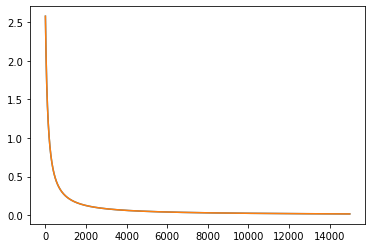

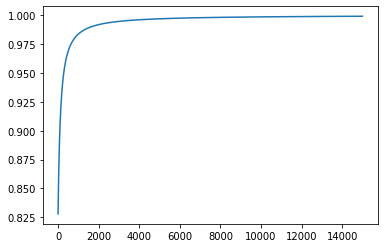

<Figure size 432x288 with 0 Axes>

In [28]:

def create_binary_data(size):
    input = []
    output = []
    
    for _ in range(size):
        tmp = []
        for __ in range(16):
            tmp.append((_ >> __) &1)
        input.append(tmp)
        output.append([_])
    return input, output


if __name__ == '__main__':
    neural = NeuralNetwork(
        {
            "size": [16, 10, 1],
            "activation": ["input", "sigmoid", "sigmoid" ],
        }
    );
    
    minput, moutput = create_binary_data(15)

    moutput = np.array(moutput, dtype=np.float64)
    moutput = moutput / 1e+10
    
    epoch = 15000
    batch = 4
    
    neural.train(np.array(minput, dtype=np.float64).T, np.array(moutput, dtype=np.float64).T, epoch)

    plt.figure(1)
    plt.plot(range(0, epoch), neural.losses)
    plt.subplot()
    plt.plot(range(0, epoch), neural.cost)
    plt.figure(2)
    plt.plot(range(0, epoch), neural.accurency)
    plt.figure(3)
    
    plt.show()
    